# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [ ]:
# Importamos las bibliotecas necesarias, cargamos el conjunto de datos y mostramos las primeras filas.
import numpy as np
import pandas as pd

In [ ]:
df_data = pd.read_csv("/content/Customer-Churn.csv")

In [ ]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Mostramos información básica sobre el conjunto de datos, incluyendo tipos de datos y valores nulos.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [ ]:
# Convertimos la columna "TotalCharges" a tipo numérico, tratando los errores como valores nulos.
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors="coerce")

## Manejo de datos nulos

In [ ]:
# Contamos los valores nulos en el conjunto de datos y eliminamos las filas con valores nulos.
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Eliminamos las filas con valores nulos.
df_data.dropna(inplace = True)

## Eliminar id

In [ ]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Eliminamos la columna "customerID" que no es relevante para el modelo.
df_data.drop("customerID", axis=1, inplace=True)

In [ ]:
# Reemplazamos los valores "Yes" y "No" en la columna "Churn" por 1 y 0, respectivamente.
df_data["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df_data["Churn"].replace(to_replace="No", value=0, inplace=True)

# Utilizamos codificación one-hot para las características categóricas.
df_processing = pd.get_dummies(df_processing)
df_processing.head()

## Convertir a numérico variable objetivo

In [ ]:
# Reemplazamos los valores "Yes" y "No" en la columna "Churn" por 1 y 0, respectivamente.
df_data["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df_data["Churn"].replace(to_replace="No", value=0, inplace=True)


In [ ]:
df_processing = df_data.copy(deep = True)

## Manejo de variables categóricas

In [ ]:
# Utilizamos codificación one-hot para las características categóricas.
df_processing = pd.get_dummies(df_processing)
df_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [ ]:


# Escalamos las características numéricas utilizando Min-Max Scaling.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)

# Convertimos el resultado en un DataFrame con nombres de columnas originales.
df_processing_scaled = pd.DataFrame(df_processing_scaled)
df_processing_scaled.columns = df_processing.columns
df_processing_scaled.head()

# Visualizamos la distribución de género con respecto a la columna "Churn".
import seaborn as sns

sns.countplot(data=df_data, x="gender", hue="Churn")

# Definimos una función para realizar gráficos de barras de características categóricas.
def categorical_plot(data, columns, ncols):
  # Calculamos el número de gráficos a realizar y configuramos el diseño de subparcelas.
  space = " "
  nplot = len(columns)
  nrows = (nplot // ncols) + 1
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 30), constrained_layout=True)

  # Iteramos sobre las filas y columnas de subparcelas para crear los gráficos.
  for row in range(nrows):
    for col in range(ncols):
      title = columns[row + col]
      sns.countplot(data=data, x=title, hue="Churn", ax=axes[row, col])
      axes[row, col].set_title("COUNT " + title.upper())
      axes[row, col].set_xlabel(title)
      axes[row, col].legend()

  # Ajustamos el diseño y mostramos los gráficos.
  fig.tight_layout()
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

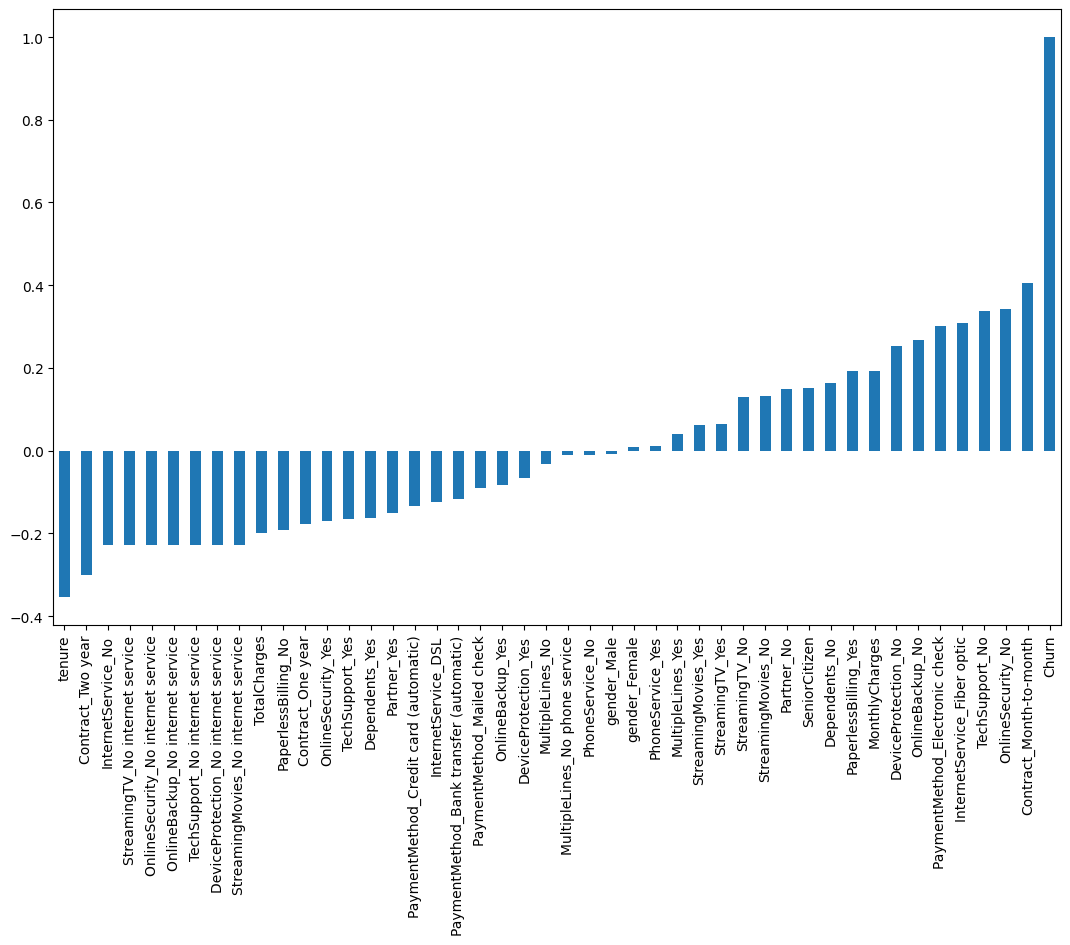

In [ ]:
# Visualizamos la correlación de las características con respecto a la columna "Churn".
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 8))
df_processing.corr()["Churn"].sort_values(ascending=True).plot(kind="bar")
plt.show()

## Escalabilidad de los datos

In [ ]:
# Escalamos las características numéricas utilizando Min-Max Scaling.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)

In [ ]:
# Convertimos el resultado en un DataFrame con nombres de columnas originales.
df_processing_scaled = pd.DataFrame(df_processing_scaled)
df_processing_scaled.columns = df_processing.columns
df_processing_scaled.head()

# Visualizamos la distribución de género con respecto a la columna "Churn".
import seaborn as sns

sns.countplot(data=df_data, x="gender", hue="Churn")

# Definimos una función para realizar gráficos de barras de características categóricas.
def categorical_plot(data, columns, ncols):
  # Calculamos el número de gráficos a realizar y configuramos el diseño de subparcelas.
  space = " "
  nplot = len(columns)
  nrows = (nplot // ncols) + 1
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 30), constrained_layout=True)

  # Iteramos sobre las filas y columnas de subparcelas para crear los gráficos.
  for row in range(nrows):
    for col in range(ncols):
      title = columns[row + col]
      sns.countplot(data=data, x=title, hue="Churn", ax=axes[row, col])
      axes[row, col].set_title("COUNT " + title.upper())
      axes[row, col].set_xlabel(title)
      axes[row, col].legend()

  # Ajustamos el diseño y mostramos los gráficos.
  fig.tight_layout()
  plt.show()

In [ ]:
# Convertimos el resultado en un DataFrame con nombres de columnas originales.
df_processing_scaled = pd.DataFrame(df_processing_scaled)
df_processing_scaled.columns = df_processing.columns
df_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

<Axes: xlabel='gender', ylabel='count'>

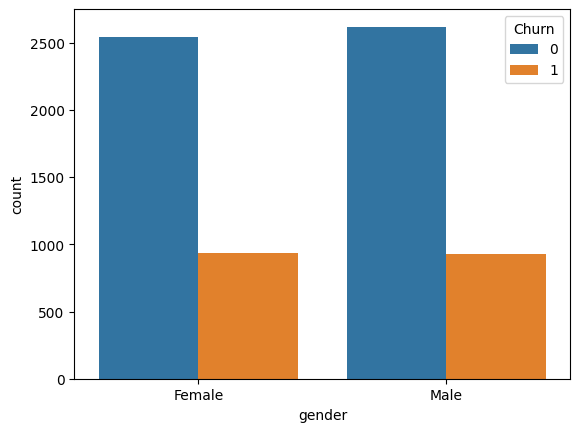

In [ ]:
# Visualizamos la distribución de género con respecto a la columna "Churn".
import seaborn as sns

sns.countplot(data=df_data, x="gender", hue="Churn")

In [ ]:
# Definimos una función para realizar gráficos de barras de características categóricas.
def categorical_plot(data, columns, ncols):
  # Calculamos el número de gráficos a realizar y configuramos el diseño de subparcelas.
  space = " "
  nplot = len(columns)
  nrows = (nplot // ncols) + 1
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 30), constrained_layout=True)

  # Iteramos sobre las filas y columnas de subparcelas para crear los gráficos.
  for row in range(nrows):
    for col in range(ncols):
      title = columns[row + col]
      sns.countplot(data=data, x=title, hue="Churn", ax=axes[row, col])
      axes[row, col].set_title("COUNT " + title.upper())
      axes[row, col].set_xlabel(title)
      axes[row, col].legend()

  # Ajustamos el diseño y mostramos los gráficos.
  fig.tight_layout()
  plt.show()

In [ ]:
categorical_columns = df_data.select_dtypes(include = "object").columns


categorical_plot(data = df_data, columns = categorical_columns, ncols = 3)


# Función 2 para plot de variable categorica
def plot_categorical(column):
  fig = plt.figure(figsize=(10,10))
  sns.countplot(data = df_data, x = column, hue = "Churn")
  plt.show()


  for _ in categorical_columns:
  plot_categorical(_)


  sns.pairplot(data = df_data, hue = "Churn")




In [ ]:
categorical_columns = df_data.select_dtypes(include = "object").columns

<ipython-input-22-2d34600d9b75>:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


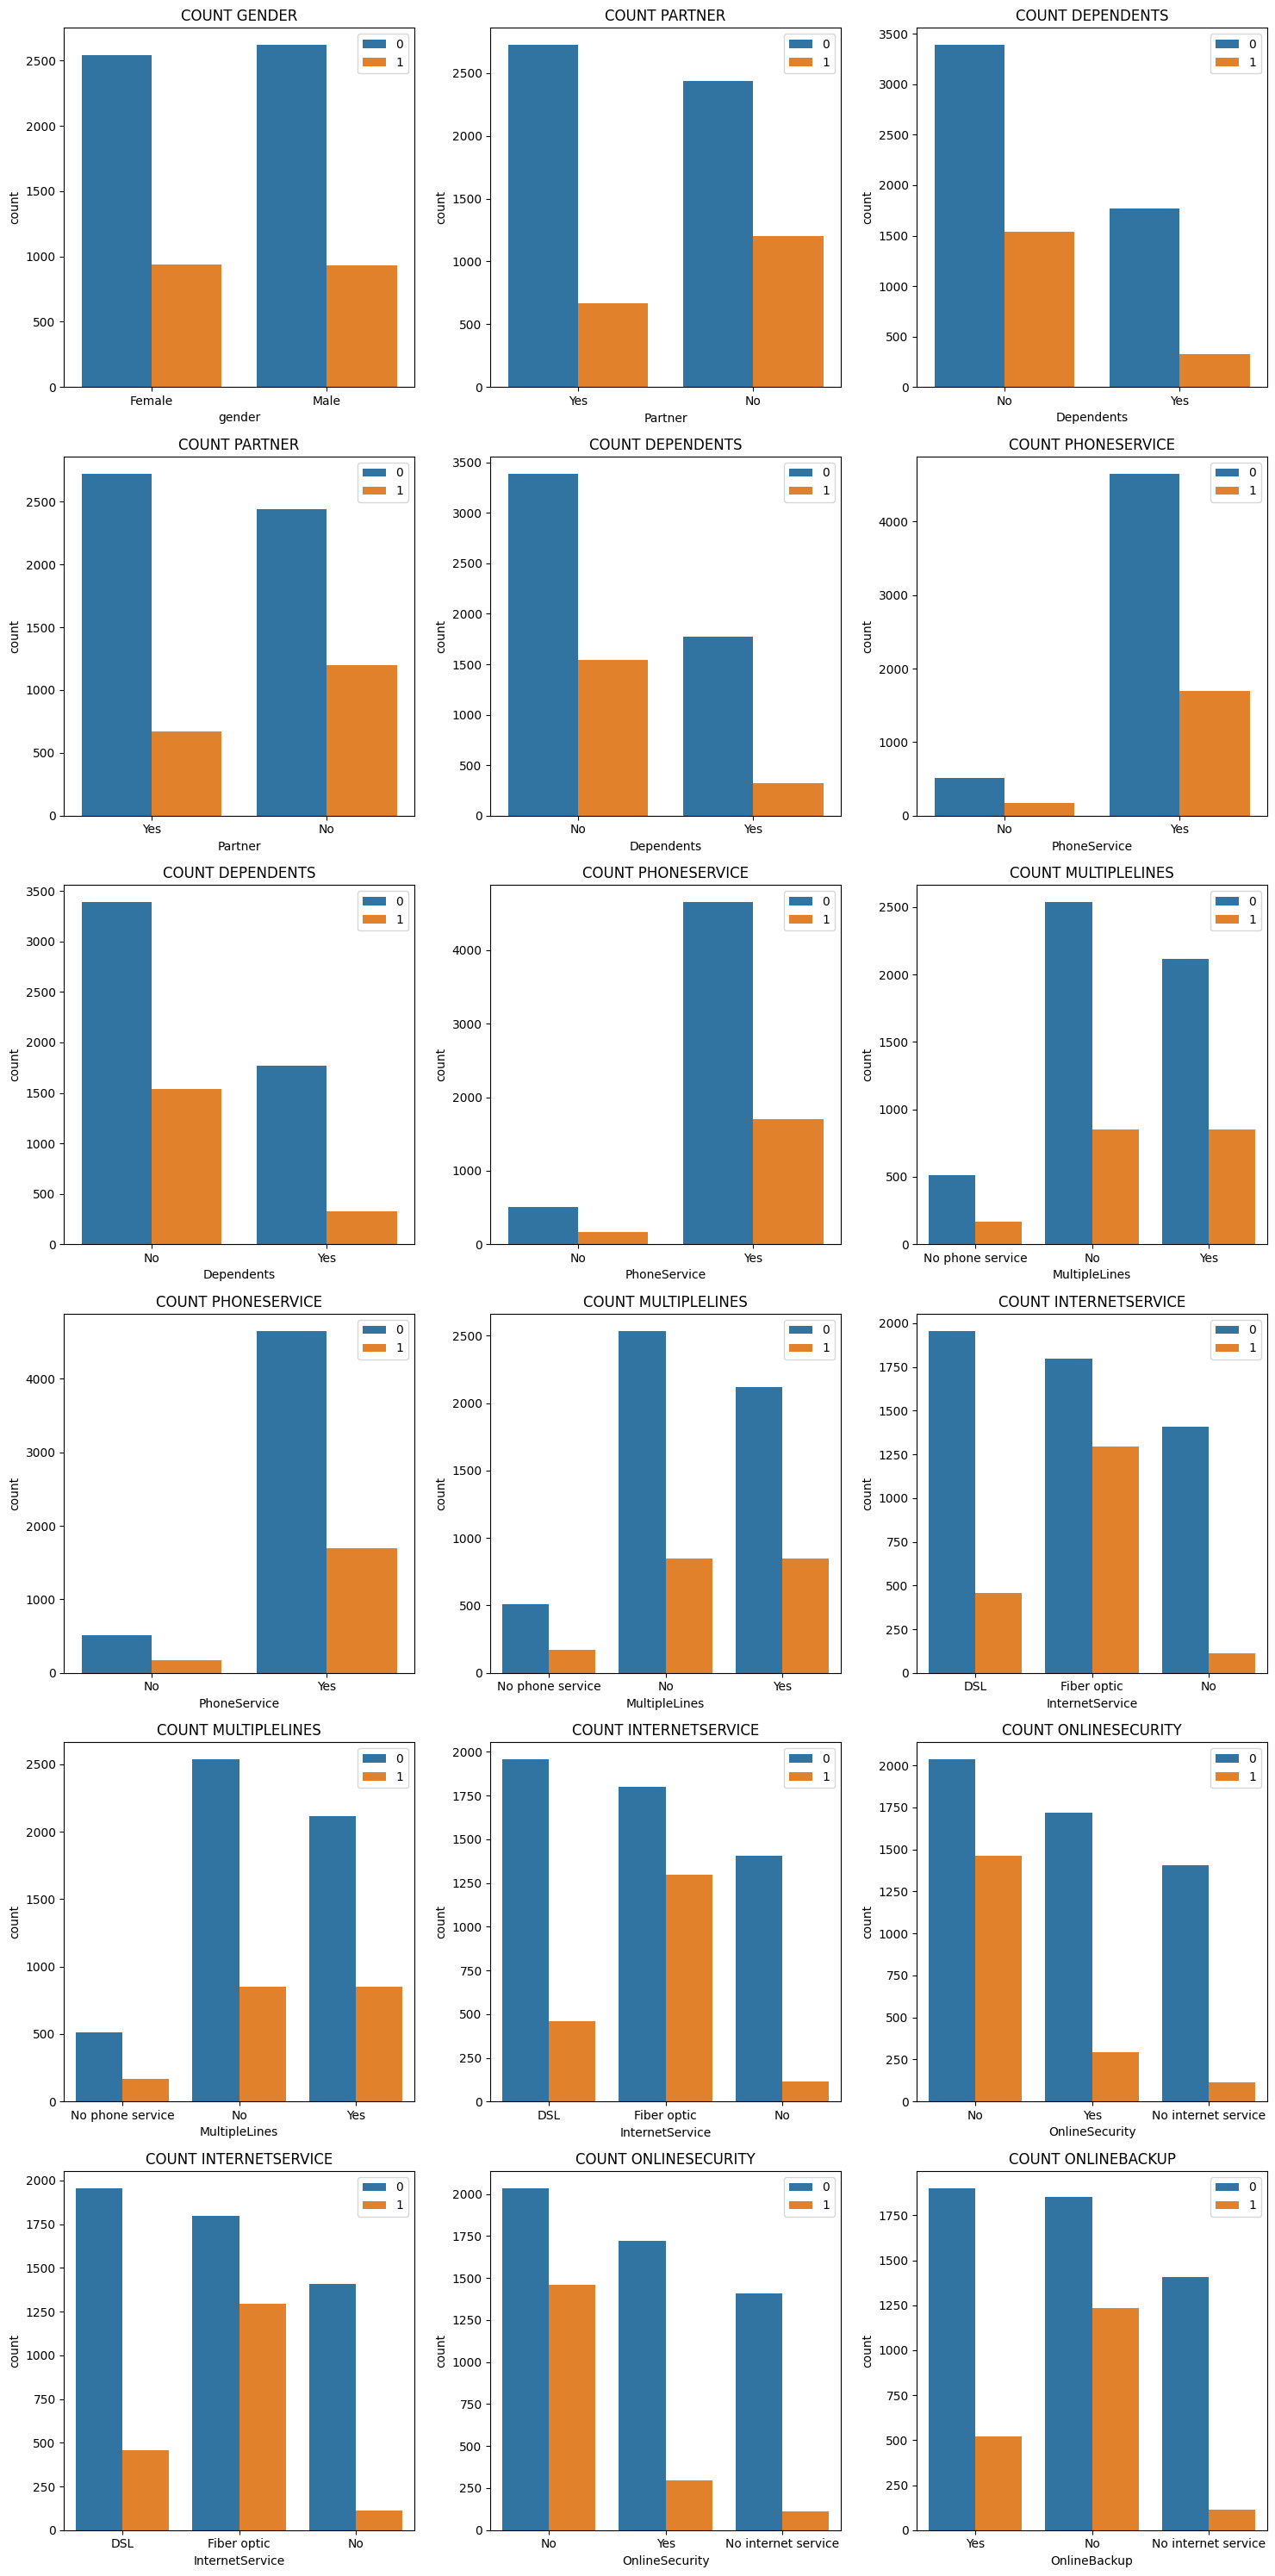

In [ ]:
categorical_plot(data = df_data, columns = categorical_columns, ncols = 3)

In [ ]:
# Función 2 para plot de variable categorica
def plot_categorical(column):
  fig = plt.figure(figsize=(10,10))
  sns.countplot(data = df_data, x = column, hue = "Churn")
  plt.show()

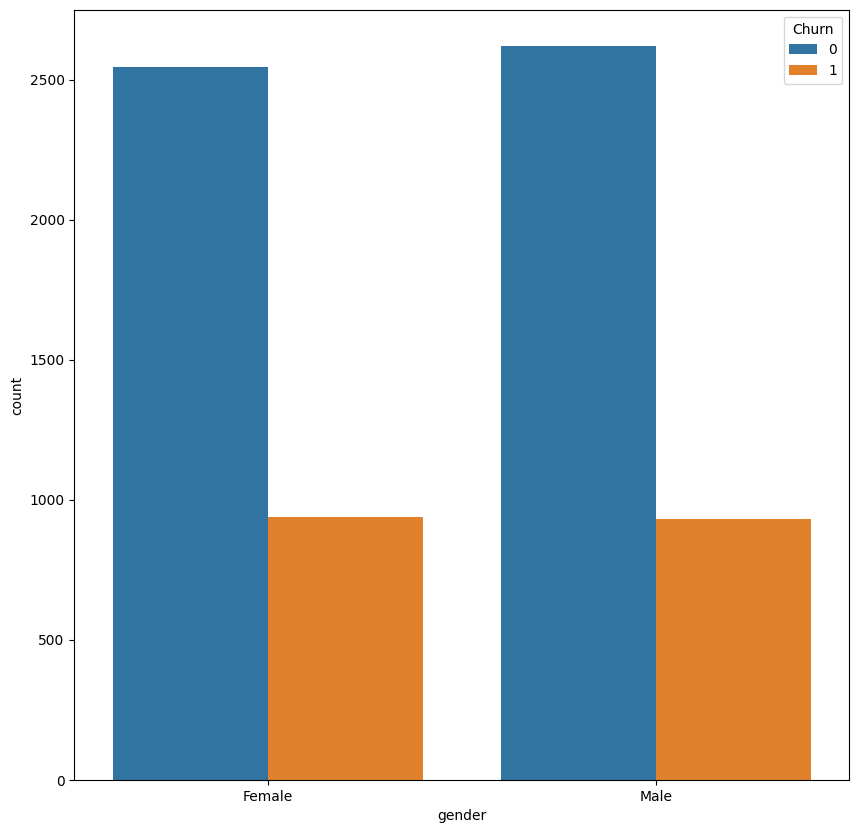

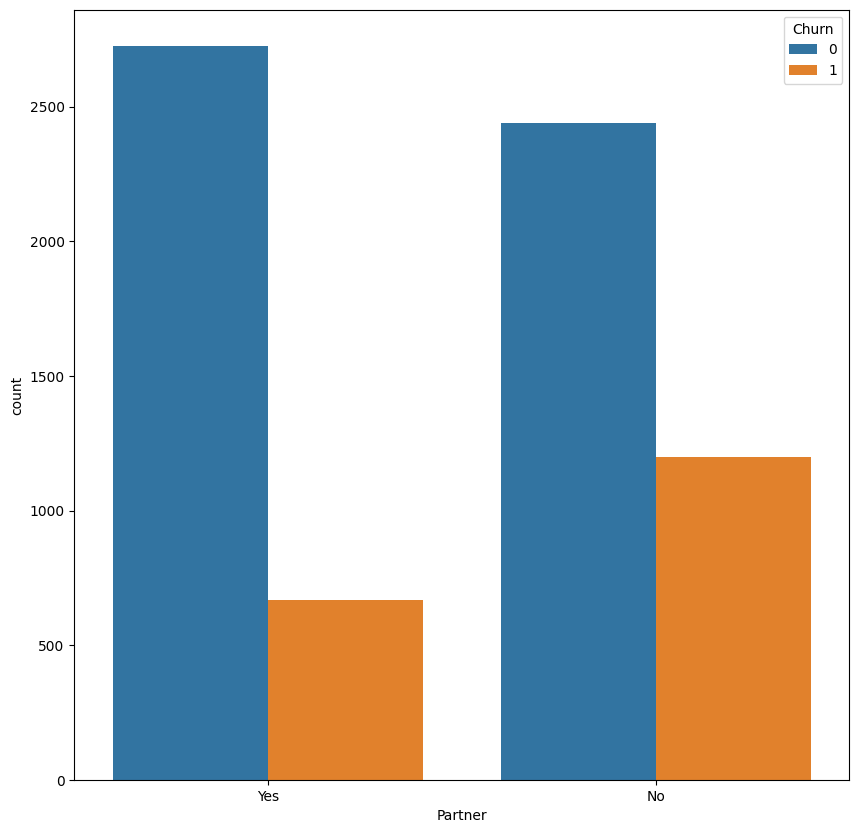

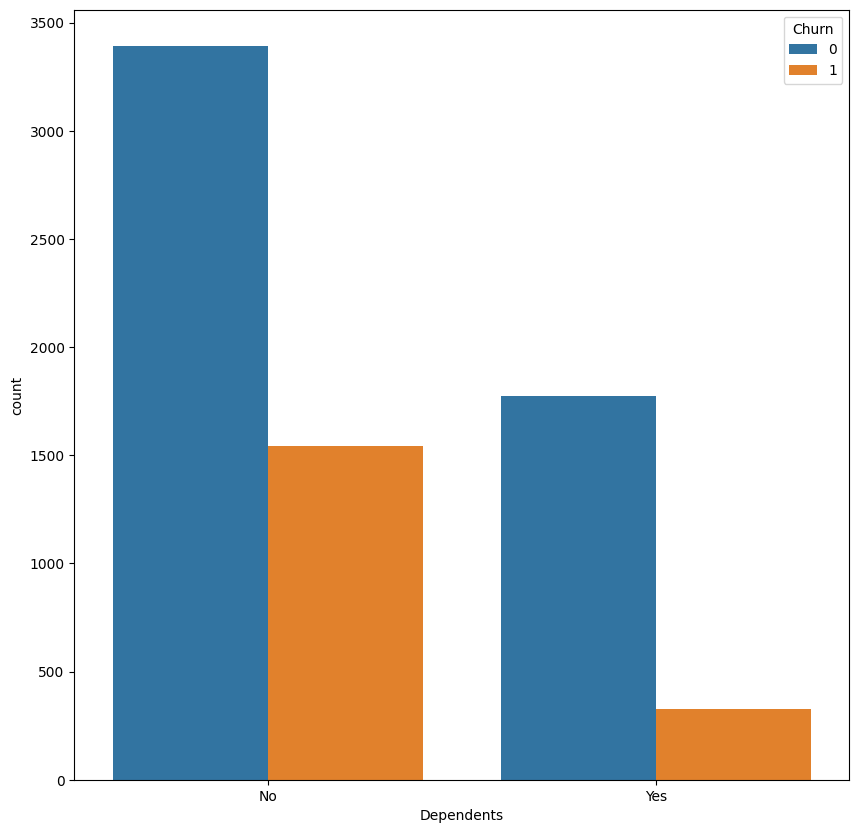

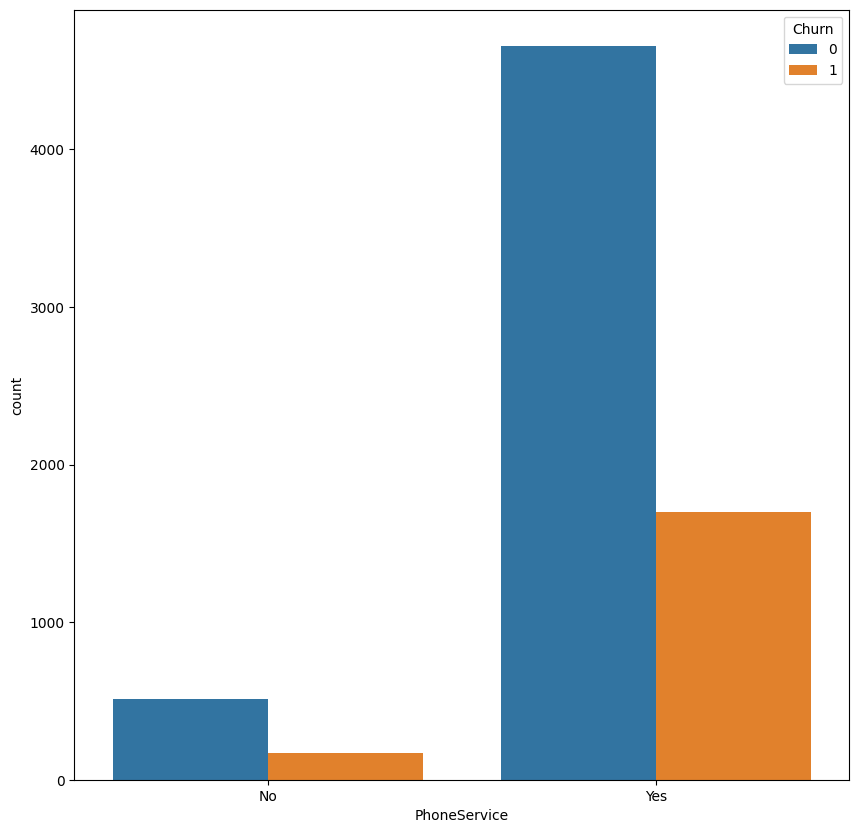

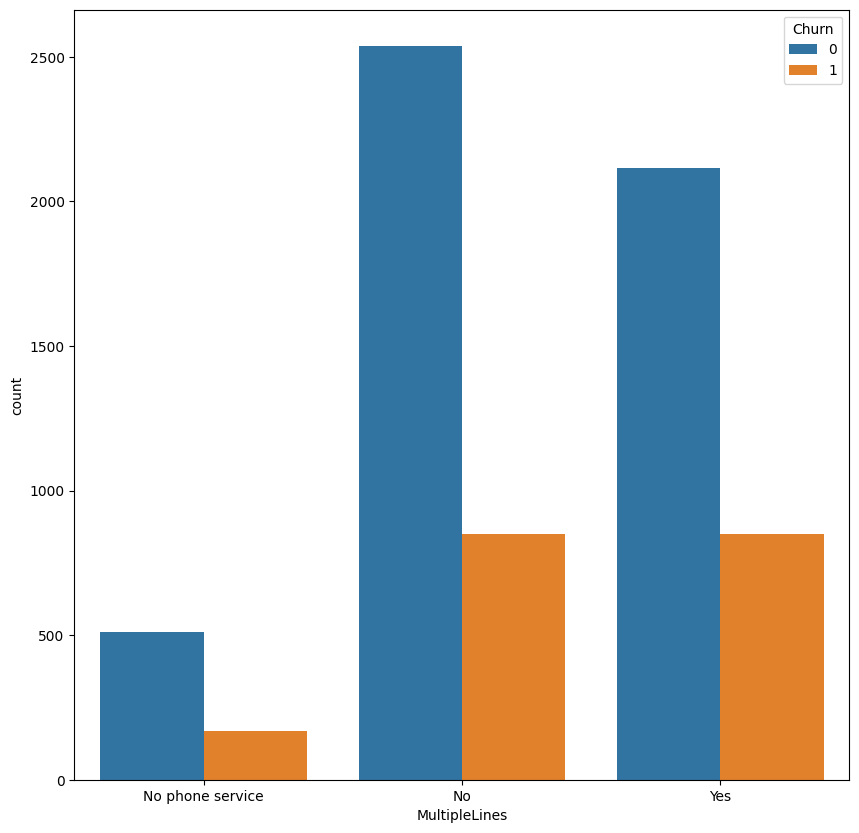

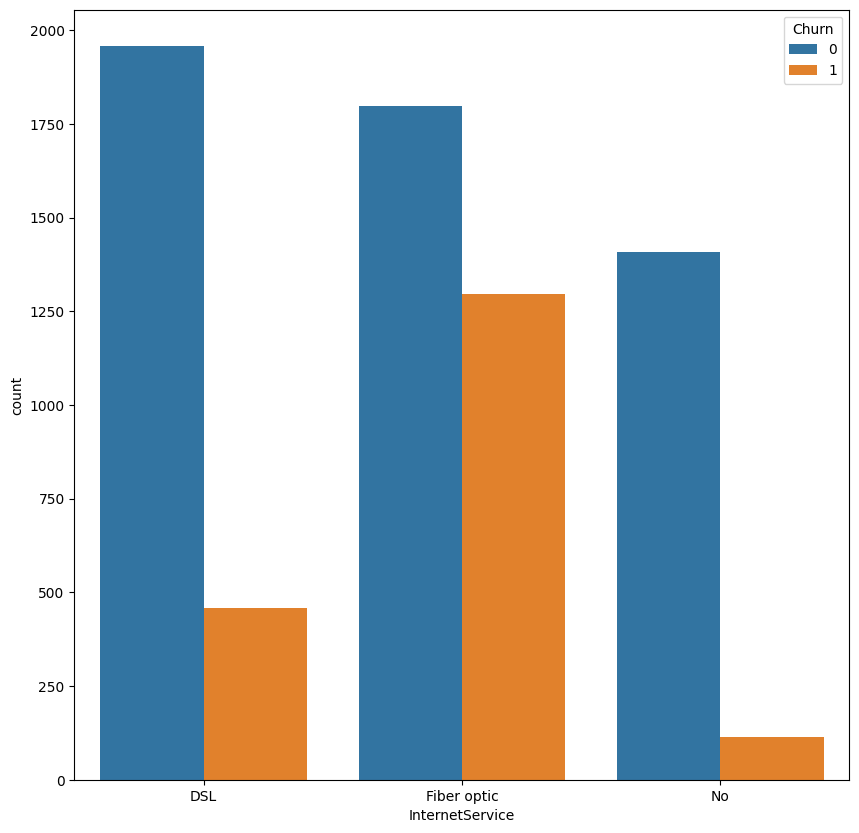

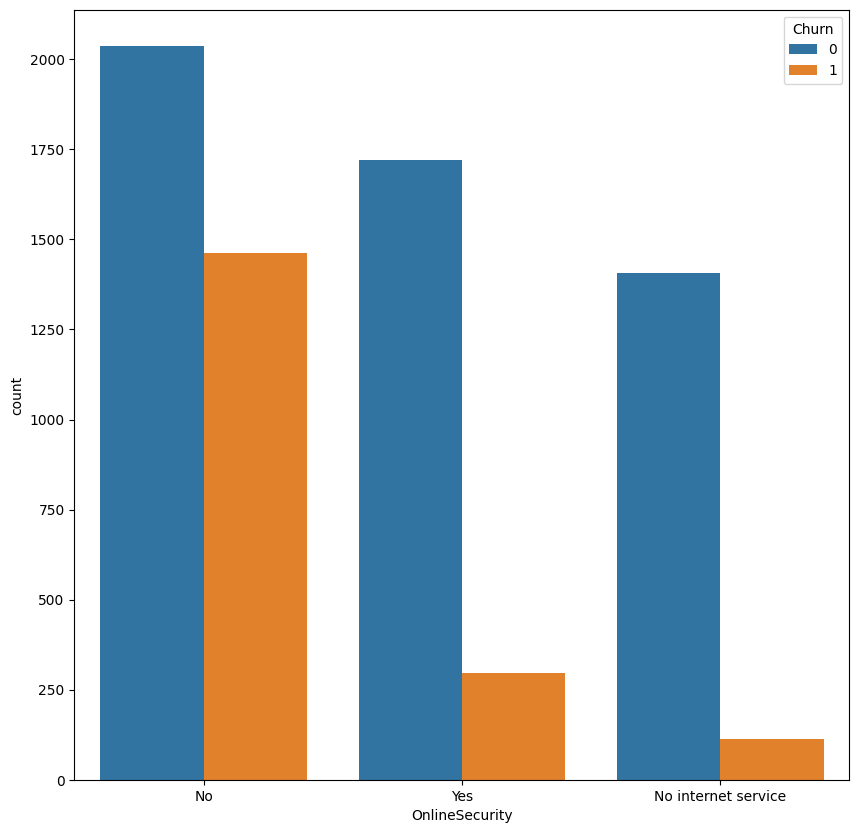

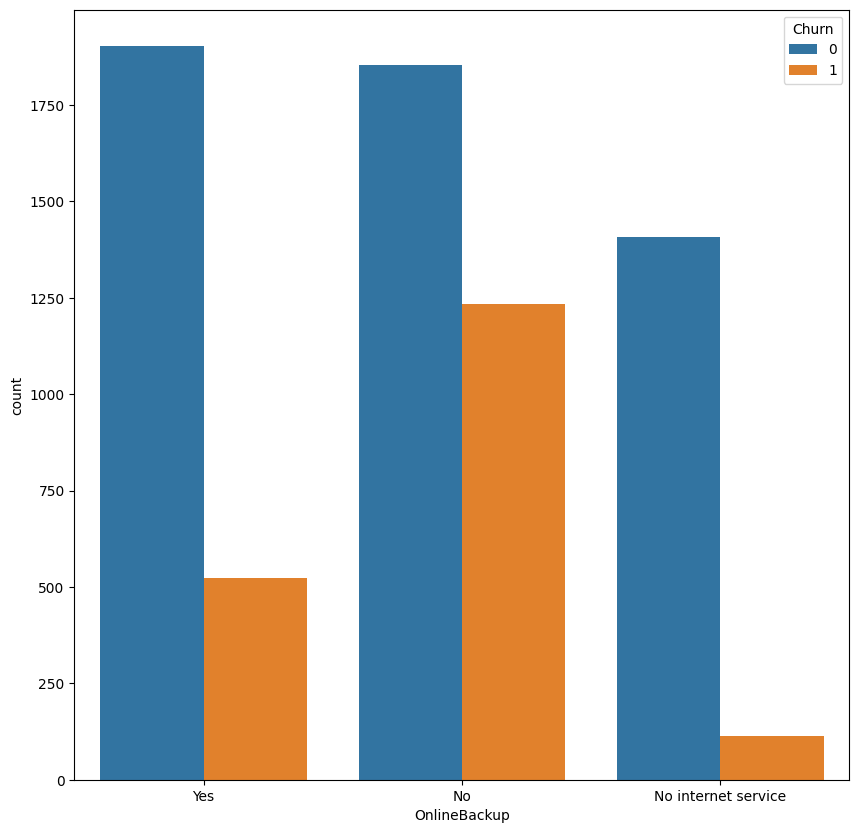

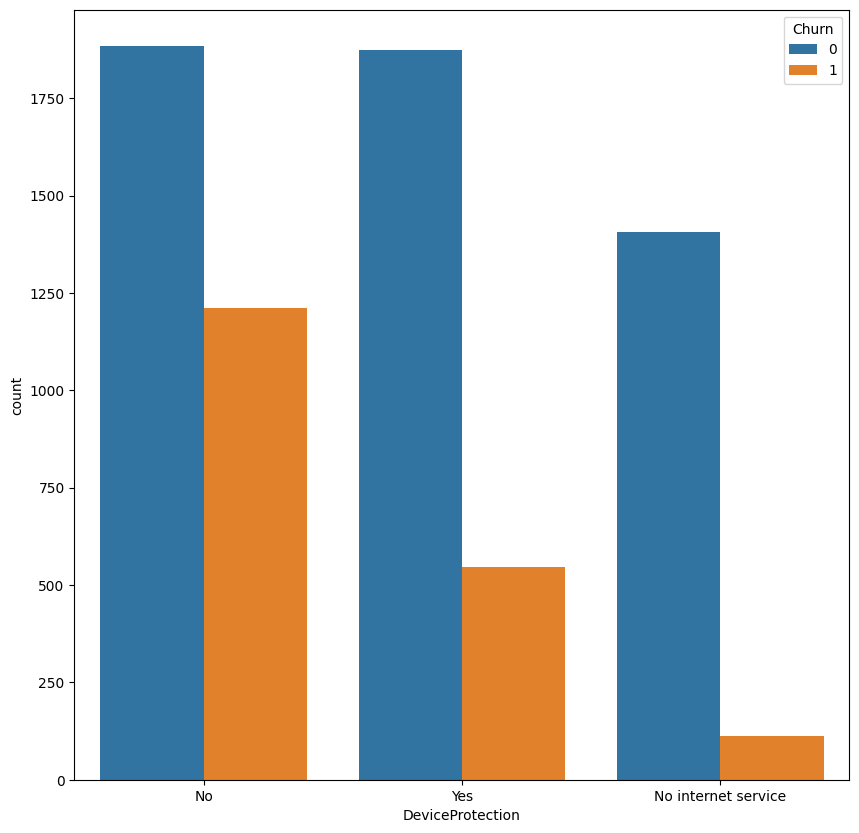

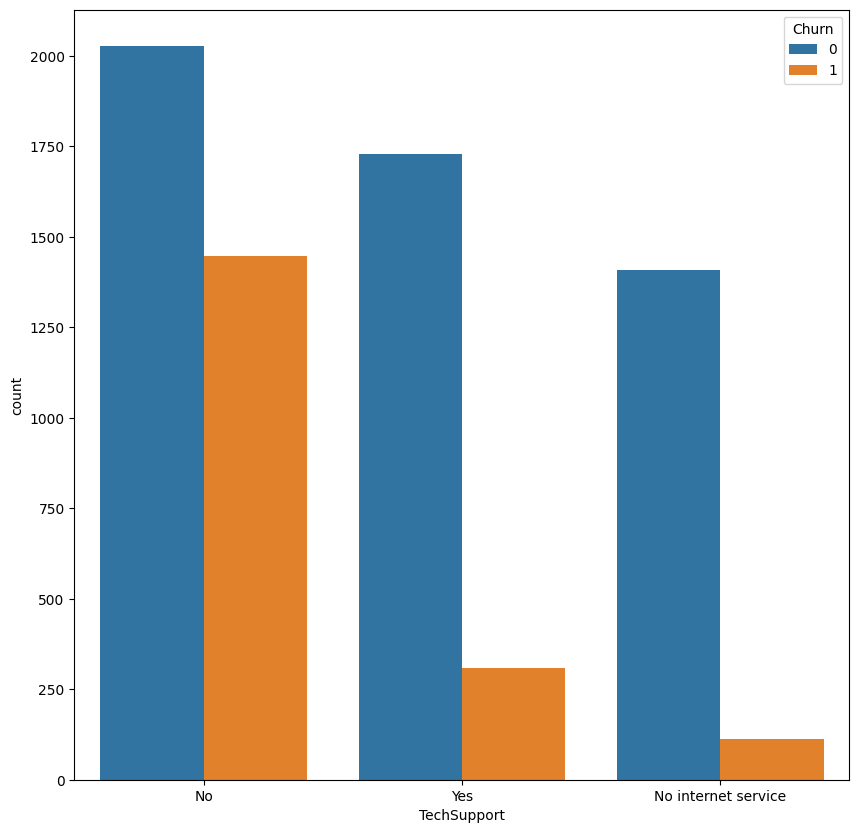

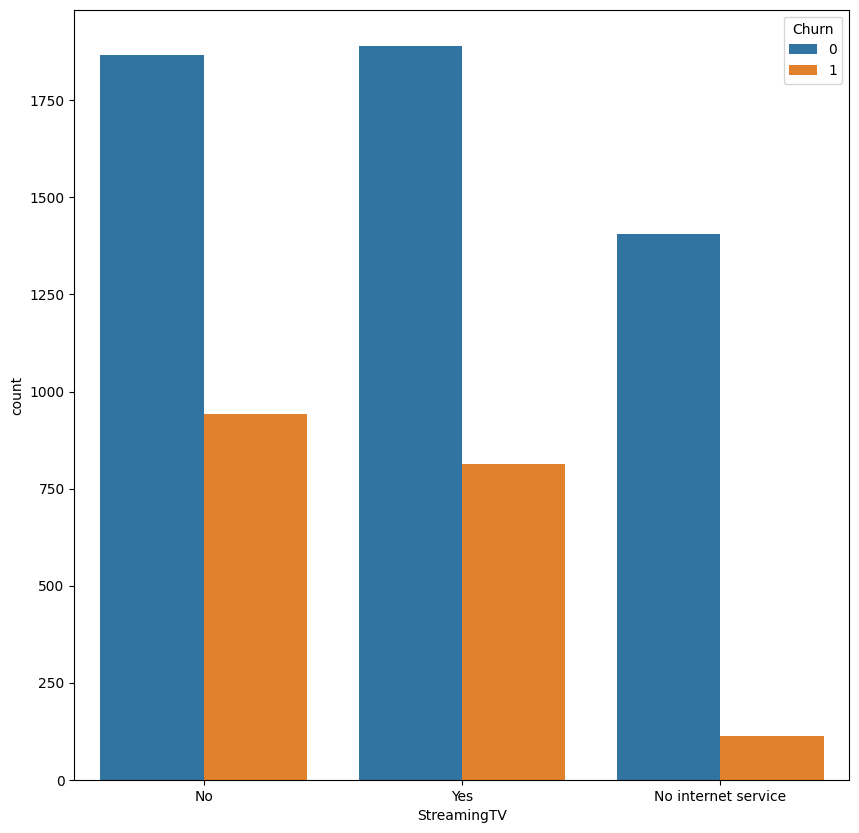

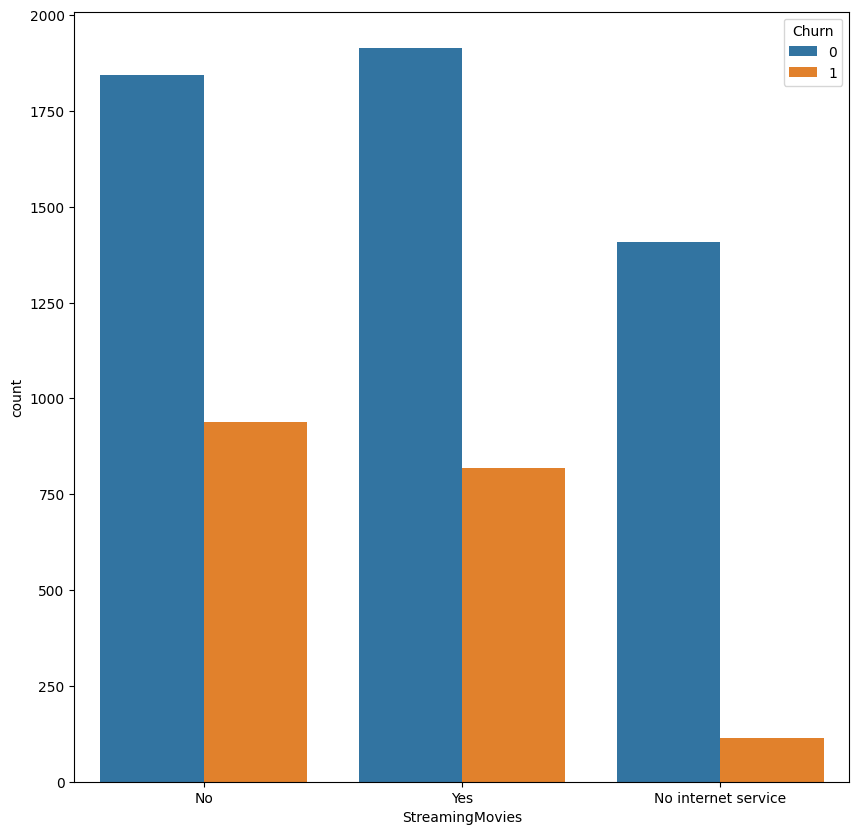

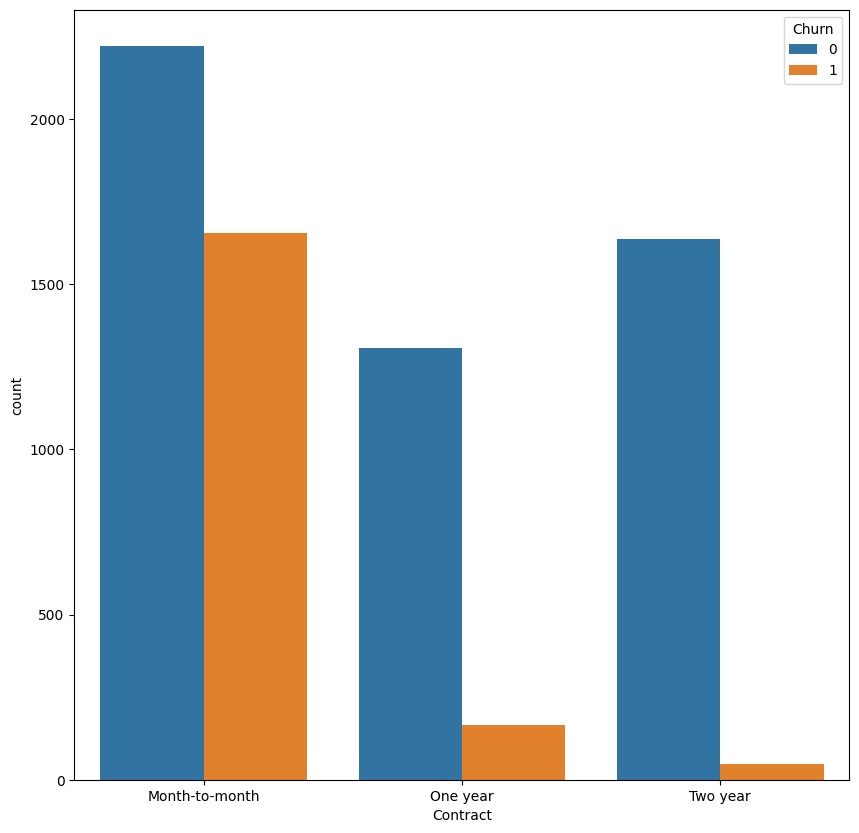

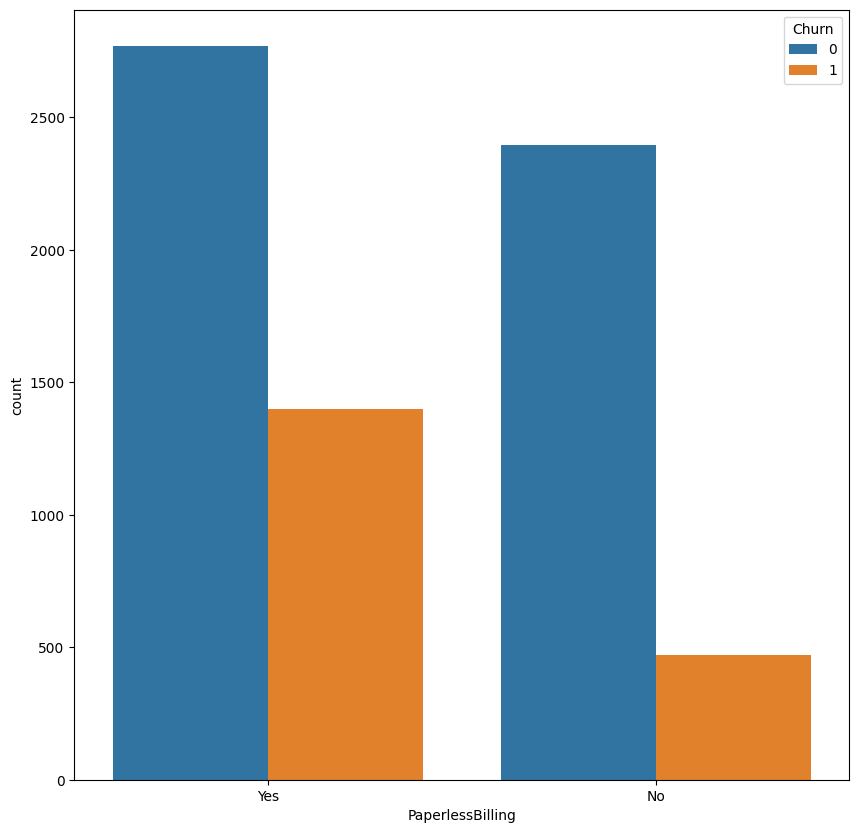

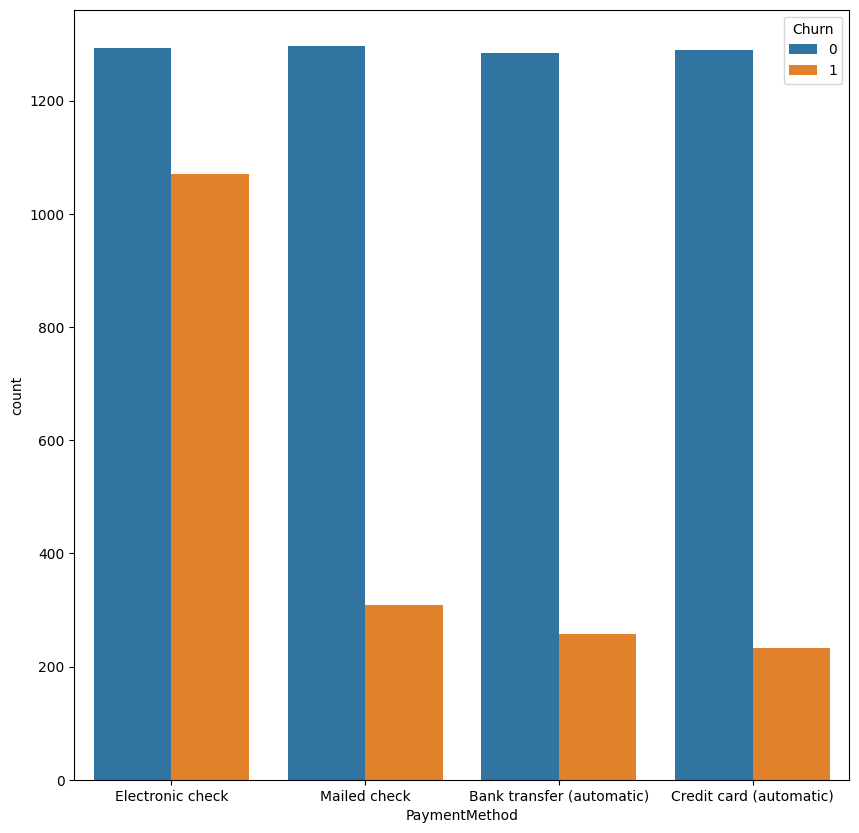

In [ ]:
for _ in categorical_columns:
  plot_categorical(_)

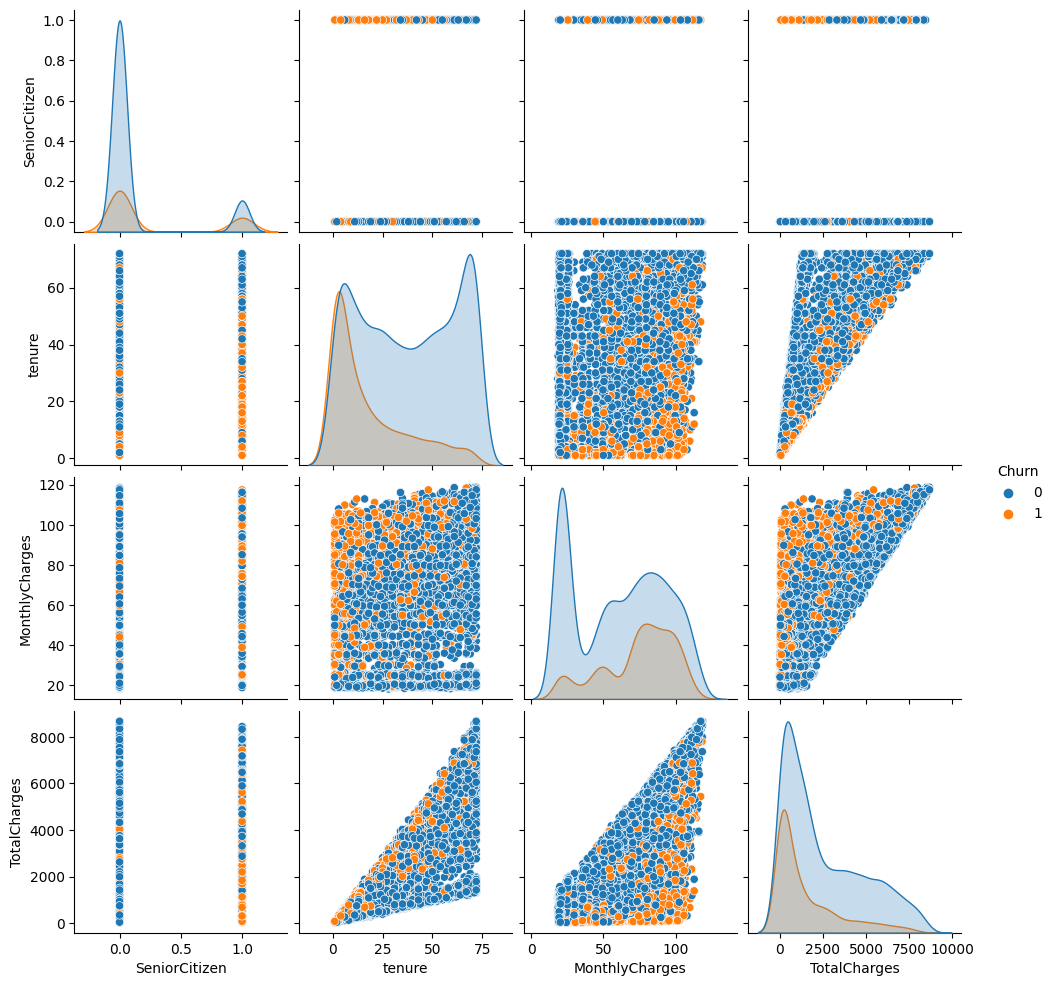

In [ ]:
sns.pairplot(data = df_data, hue = "Churn")

## Entrenamiento del modelo de regresión logística binomial

In [ ]:
# Dividimos los datos en características (X) y la variable objetivo (y).
X = df_processing_scaled.drop("Churn", axis=1)
y = df_processing_scaled["Churn"].values

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Importamos el modelo de regresión logística y lo ajustamos a los datos de entrenamiento.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Realizamos predicciones en el conjunto de prueba.
prediction = model.predict(X_test)

In [ ]:

# Calculamos y mostramos la precisión del modelo en el conjunto de prueba.
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediction))

0.795734597156398


## Evaluación del modelo

In [ ]:
# Mostramos las probabilidades predichas para cada clase (0 y 1).
model.predict_proba(X_test)

array([[0.9902118 , 0.0097882 ],
       [0.86177512, 0.13822488],
       [0.30193053, 0.69806947],
       ...,
       [0.99028271, 0.00971729],
       [0.70132406, 0.29867594],
       [0.82865273, 0.17134727]])

In [ ]:
# Obtenemos los coeficientes del modelo, que representan la importancia de cada característica.
model.coef_

array([[ 2.16456329e-01, -3.10072438e+00, -1.62275558e-01,
         1.19637002e+00,  9.38227765e-04, -2.24786684e-02,
        -7.14958453e-02,  4.99554047e-02,  1.16808125e-01,
        -1.38348565e-01,  8.51141942e-02, -1.06654635e-01,
        -1.58854568e-01,  8.51141942e-02,  5.21999335e-02,
        -4.17809899e-01,  5.11407650e-01, -1.15138192e-01,
         2.40091205e-01, -1.15138192e-01, -1.46493454e-01,
         8.40771354e-02, -1.15138192e-01,  9.52061616e-03,
         5.65202109e-02, -1.15138192e-01,  3.70775407e-02,
         2.20216931e-01, -1.15138192e-01, -1.26619180e-01,
        -8.59200111e-02, -1.15138192e-01,  1.79517763e-01,
        -8.76623695e-02, -1.15138192e-01,  1.81260121e-01,
         7.42705642e-01, -9.75380680e-02, -6.66708014e-01,
        -1.13990474e-01,  9.24500336e-02, -2.72553507e-03,
        -1.58698780e-01,  2.16924691e-01, -7.70408172e-02]])

In [ ]:
# Mostramos los nombres de las características utilizadas en el modelo.
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


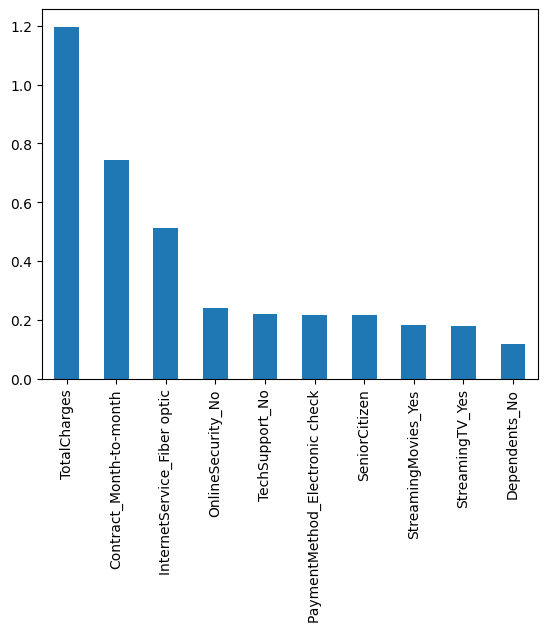

In [ ]:
# Visualizamos los pesos (coeficientes) de las 10 características más importantes.
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)


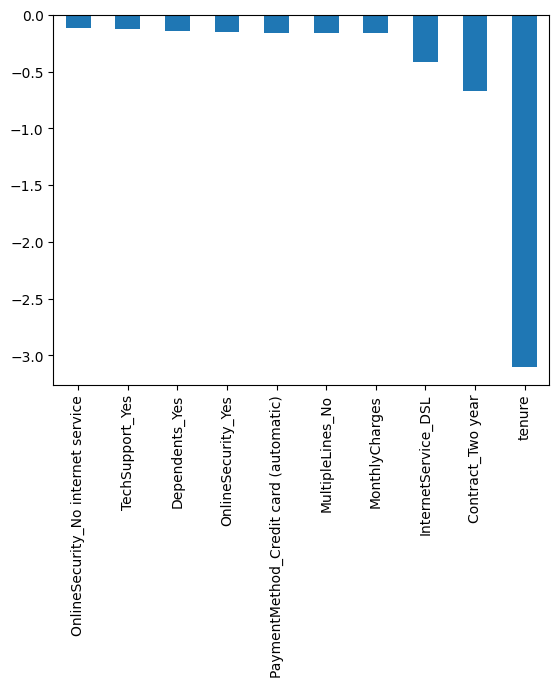

In [ ]:
# Visualizamos los pesos (coeficientes) de las 10 características menos importantes.
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar"))

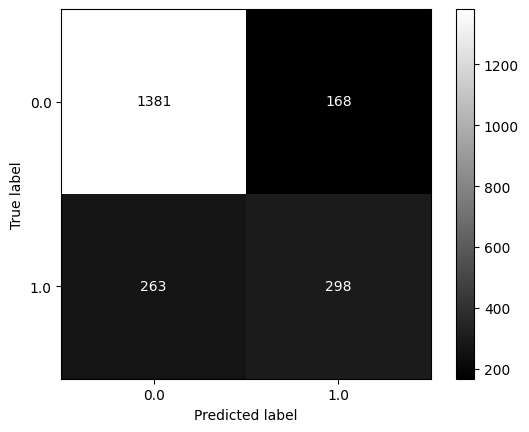

In [ ]:
# Mostramos la matriz de confusión para evaluar el rendimiento del modelo.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="gray")
plt.show()